<a href="https://colab.research.google.com/github/MalyutinaYD/laboratory-work-data-mining/blob/main/Lab_2_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
iris = load_iris(as_frame=True).frame
iris = iris.rename(columns = {'sepal length (cm)':'sl',
                              'sepal width (cm)':'sw',
                              'petal length (cm)':'pl',
                              'petal width (cm)':'pw'})
iris_target = iris.target#.replace([1,2],[2,1])
iris = iris.drop('target', axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(iris)
iris_norm = pd.DataFrame(scaler, columns=iris.columns)

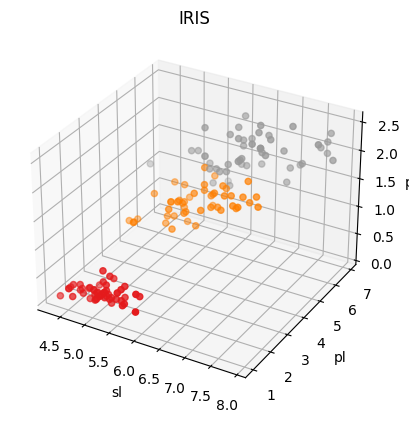

In [4]:
save_or_show_plots = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs='sl', ys='pl', zs='pw', data=iris, c=iris_target, cmap='Set1')
ax.set_title("IRIS")
ax.set_xlabel("sl")
ax.set_ylabel("pl")
ax.set_zlabel("pw")
if save_or_show_plots:
    plt.savefig('3D_without_sw_start.png')
else:
    plt.show()



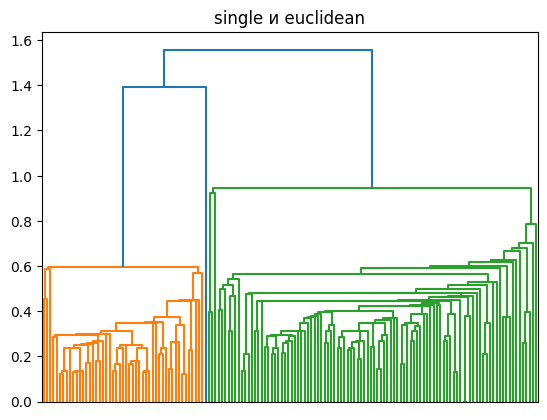

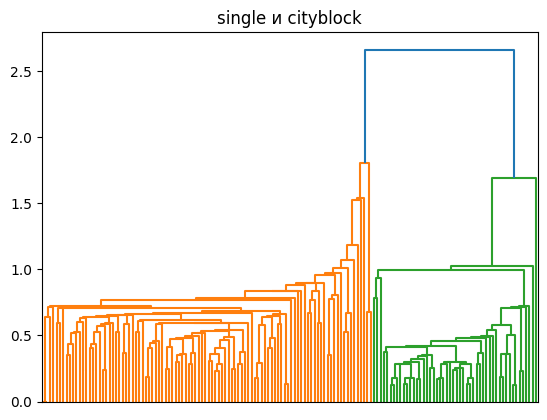

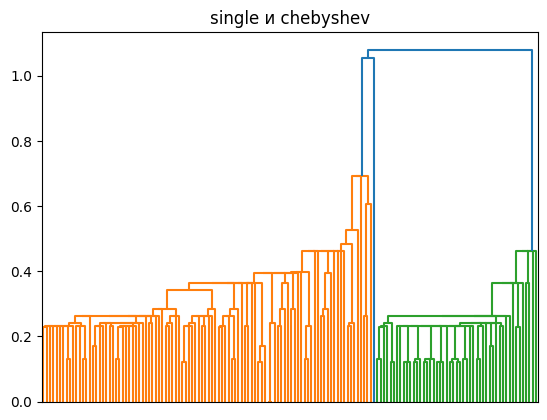

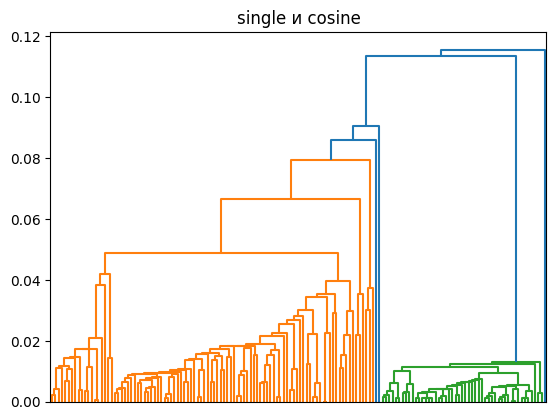

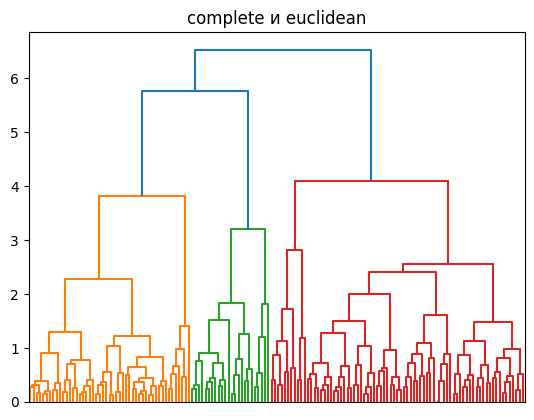

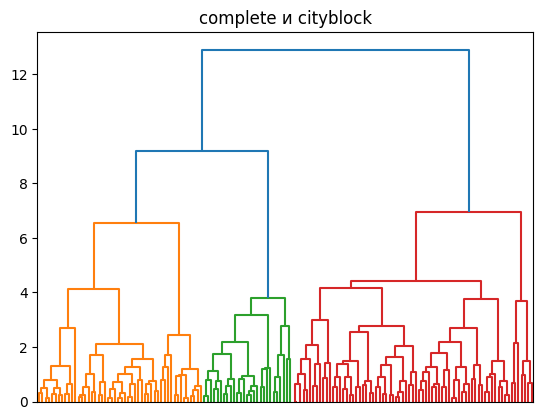

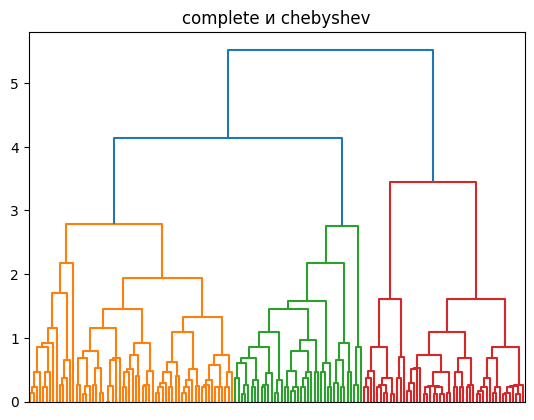

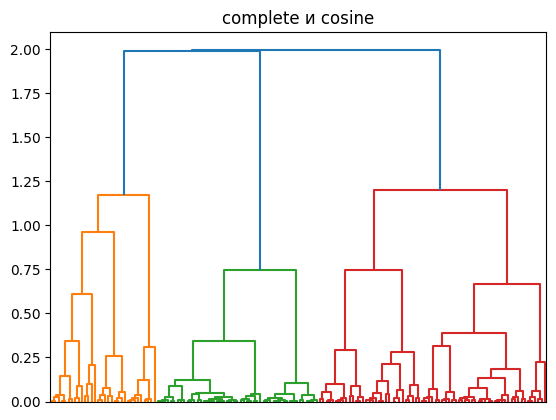

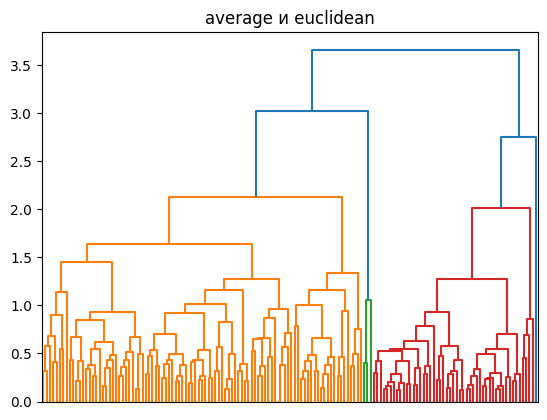

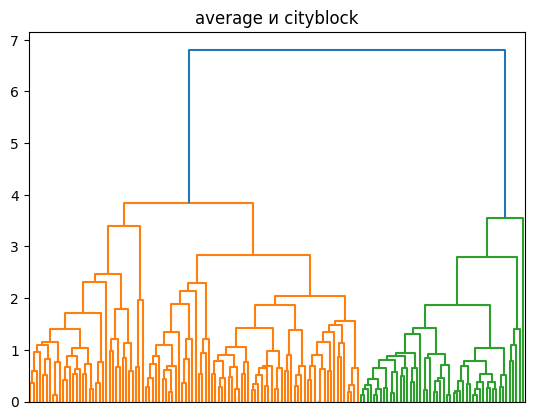

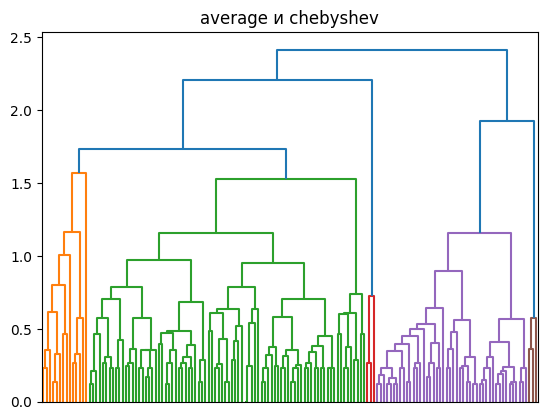

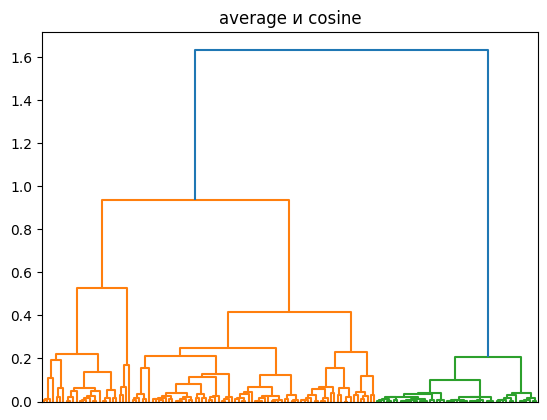

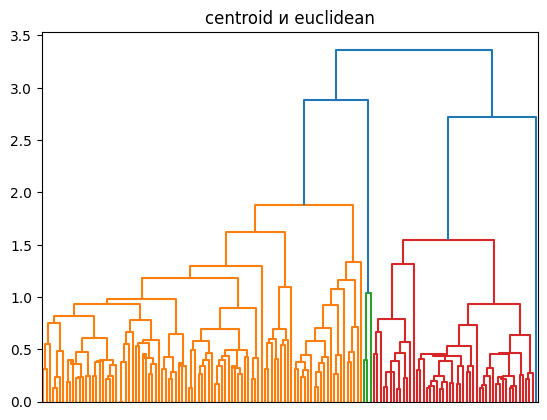

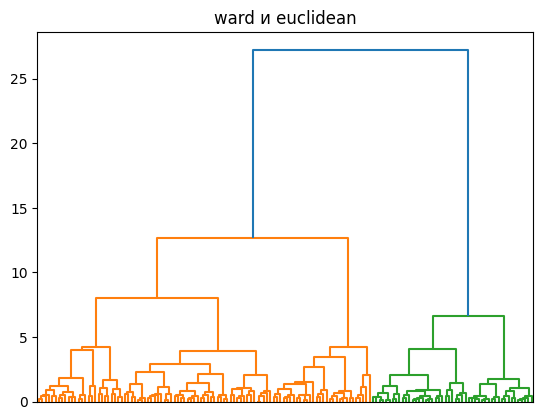

In [5]:
cols_od_ic = itertools.product(['single', 'complete', 'average', 'centroid', 'ward'],
['euclidean', 'cityblock', 'chebyshev', 'cosine'])

for cols in cols_od_ic:
    match cols:
        case [('centroid'|'ward'), ('cityblock'|'chebyshev'|'cosine')]:
            continue
    linked = linkage(iris_norm,
                        method=cols[0],
                        metric=cols[1])
    _ = plt.figure()
    _ = dendrogram(linked,
                orientation='top',
                no_labels=True,
                distance_sort='descending',
                show_leaf_counts=True)
    _ = plt.title(f'{cols[0]} и {cols[1]}')

    plt.show()


sl		sw		pl		pw
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[0.37741762 0.92329566 0.02449161 0.06694199]


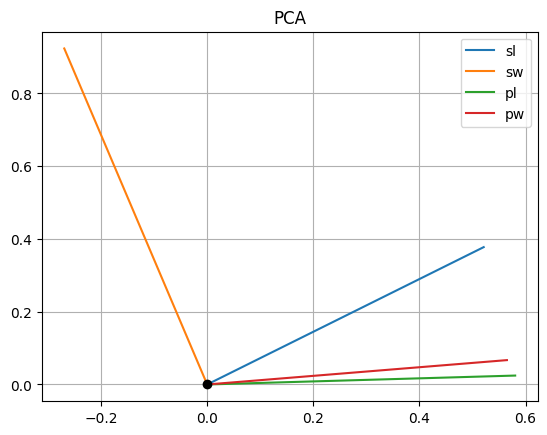

In [6]:
pca = PCA(n_components=2).fit(iris_norm)
print(*iris.columns, sep='\t\t'); \
print(*pca.components_, sep='\n')

for xs,ys in zip(*pca.components_):
    plt.plot([0, xs], [0, ys])
plt.plot(0,0,'ok')
plt.legend(iris.columns)
plt.title('PCA')
plt.grid()
plt.show()

In [7]:
pca = PCA(n_components=4).fit(iris_norm)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.72962445 0.22850762 0.03668922 0.00517871]
[20.92306556 11.7091661   4.69185798  1.76273239]


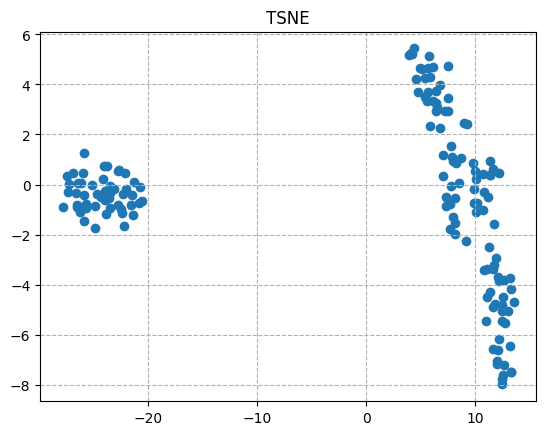

In [8]:
tsne = TSNE().fit(iris)
xs, ys = tsne.embedding_[:,0], tsne.embedding_[:,1]
plt.scatter(xs, ys)
plt.grid(which='major', linestyle='--')
plt.title('TSNE')
plt.show()


Координаты центров кластеров:
[[  7.687195     1.8050208 ]
 [-24.245802    -0.39108783]
 [ 12.109987    -5.0405693 ]]


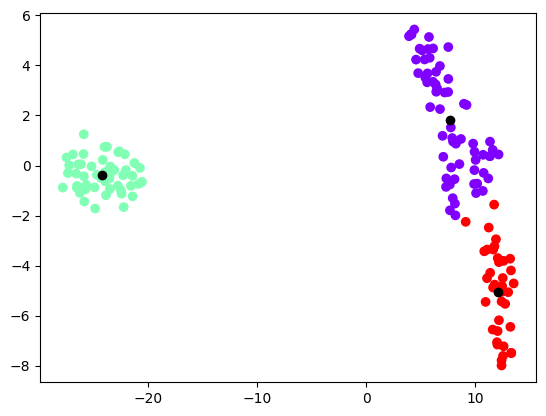

In [9]:
kmeans = KMeans(n_clusters=3, n_init=42, random_state=52)
kmeans.fit(tsne.embedding_)
print('Координаты центров кластеров:')
print(kmeans.cluster_centers_)
plt.scatter(xs, ys, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

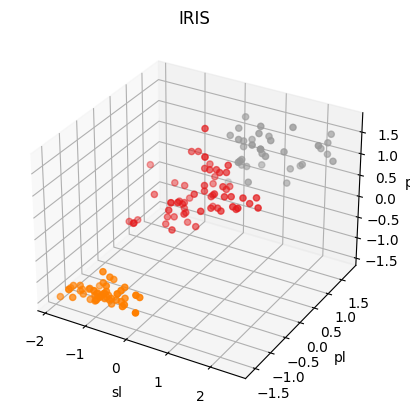

Не совпало всего 114 из 150


In [10]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs='sl', ys='pl', zs='pw', data=iris_norm, c=kmeans.labels_, cmap='Set1')
ax.set_title("IRIS")
ax.set_xlabel("sl")
ax.set_ylabel("pl")
ax.set_zlabel("pw")
plt.show()
print(f'Не совпало всего {sum(iris_target != kmeans.labels_)} из {len(kmeans.labels_)}')

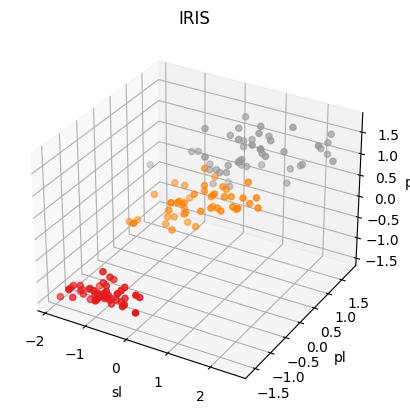

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs='sl', ys='pl', zs='pw', data=iris_norm, c=iris_target, cmap='Set1')
ax.set_title("IRIS")
ax.set_xlabel("sl")
ax.set_ylabel("pl")
ax.set_zlabel("pw")
plt.show()


In [14]:
df = pd.read_csv("baseball_players2_.csv", delimiter=';', decimal=',')
df = df.dropna()

In [15]:
t_names = {'Catcher': 0, 'Designated_Hitter' : 1, 'First_Baseman': 2, 'Outfielder': 3, 'Relief_Pitcher' : 4, 'Second_Baseman' : 5, 'Shortstop' : 6, 'Starting_Pitcher' : 7, 'Third_Baseman' : 8 }

In [16]:
data = df[['Height(inches)', 'Weight(pounds)', 'Age']].copy()
target = df['Position'].copy()
target = target.rename(t_names).dropna().copy()
target

0              Catcher
1              Catcher
2              Catcher
3        First_Baseman
4        First_Baseman
             ...      
1029    Relief_Pitcher
1030    Relief_Pitcher
1031    Relief_Pitcher
1032    Relief_Pitcher
1033    Relief_Pitcher
Name: Position, Length: 1033, dtype: object

In [17]:
def ren(x):
    if x == 'Catcher':
        x = 0
    elif x == "Designated_Hitter":
        x = 1
    elif x == "First_Baseman":
        x = 2
    elif x == "Outfielder":
        x = 3
    elif x == "Relief_Pitcher":
        x = 4
    elif x == "Second_Baseman":
        x = 5
    elif x == "Shortstop":
        x = 6
    elif x == "Starting_Pitcher":
        x = 7
    elif x == "Third_Baseman":
        x = 8
    return x
target = target.apply(ren).copy()

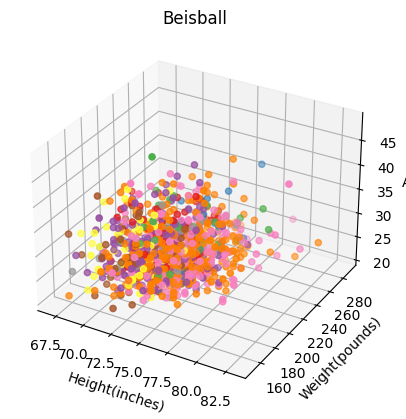

In [18]:
save_or_show_plots = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs="Height(inches)", ys='Weight(pounds)', zs='Age', data=data, c = target, cmap='Set1')
ax.set_title("Beisball")
ax.set_xlabel("Height(inches)")
ax.set_ylabel('Weight(pounds)')
ax.set_zlabel('Age')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(data)
baseb_norm = pd.DataFrame(scaler, columns=data.columns)

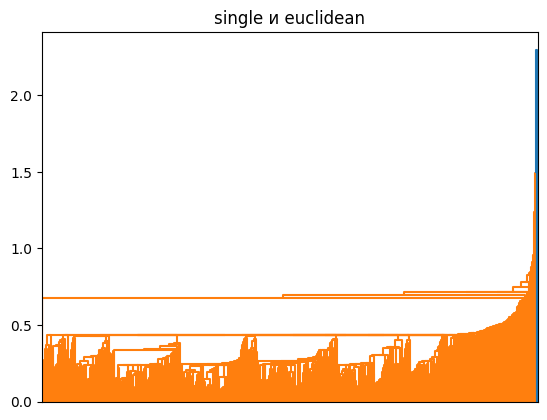

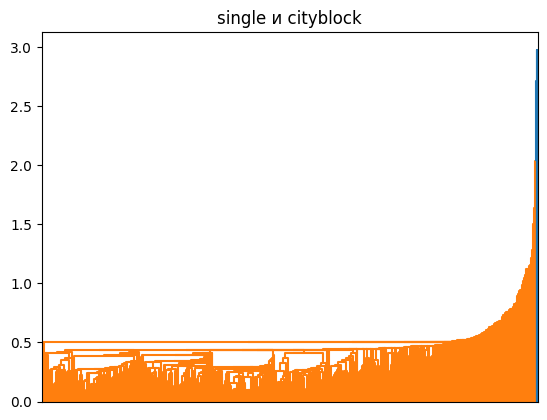

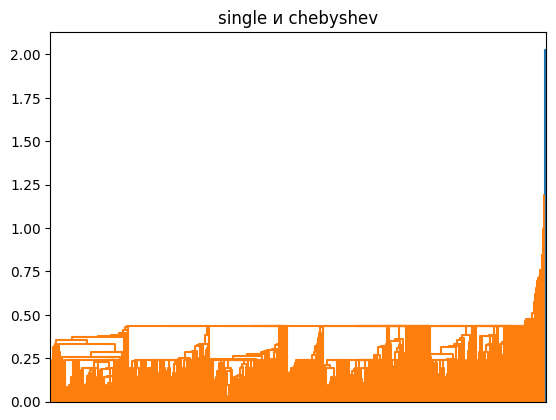

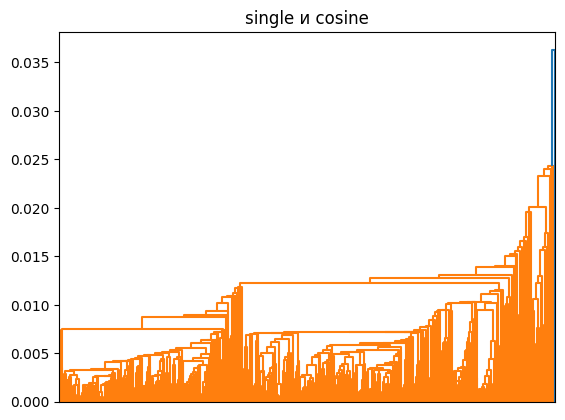

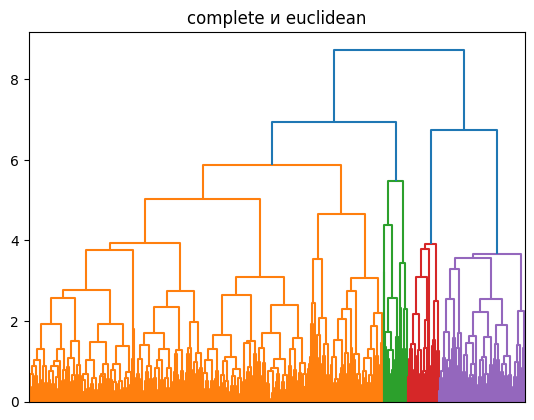

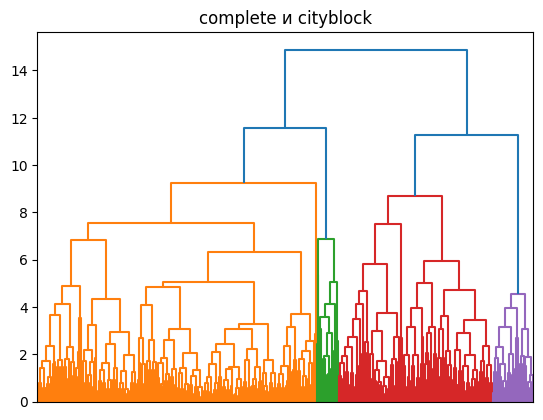

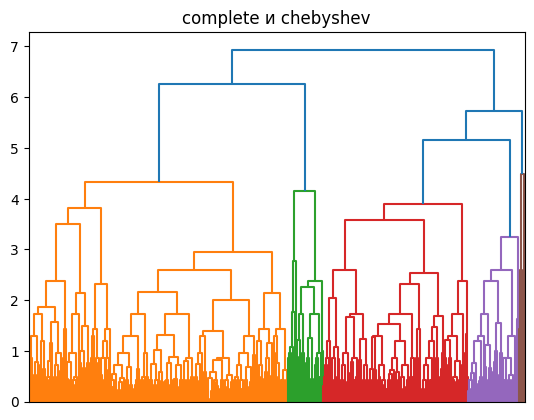

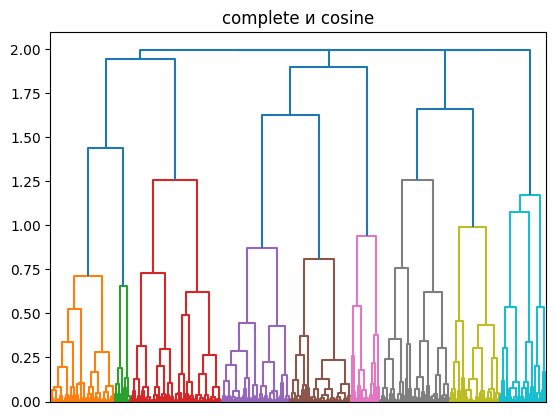

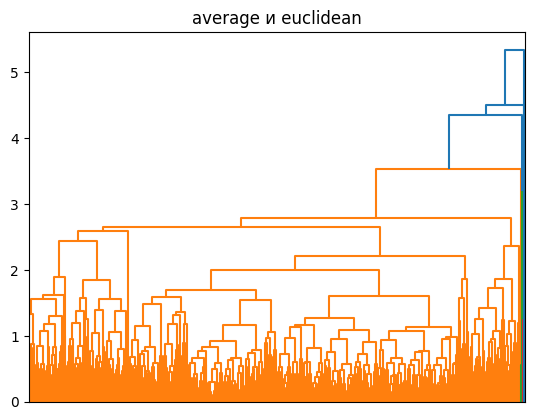

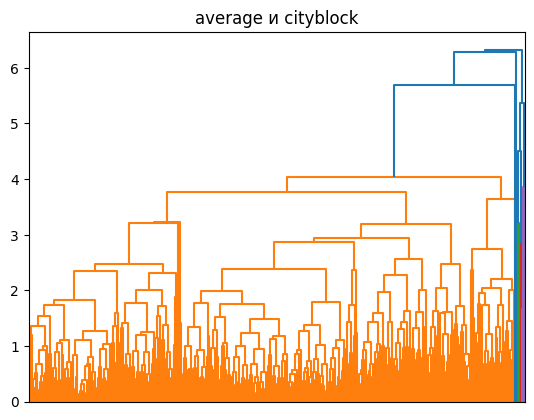

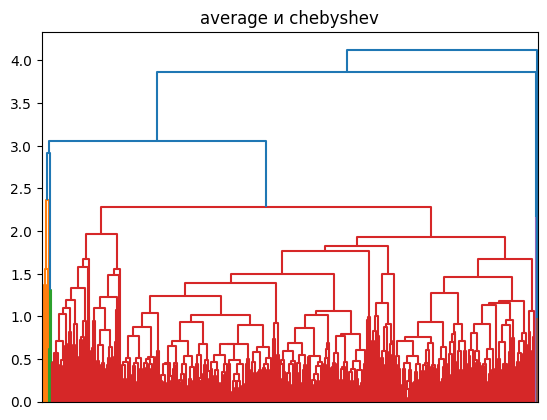

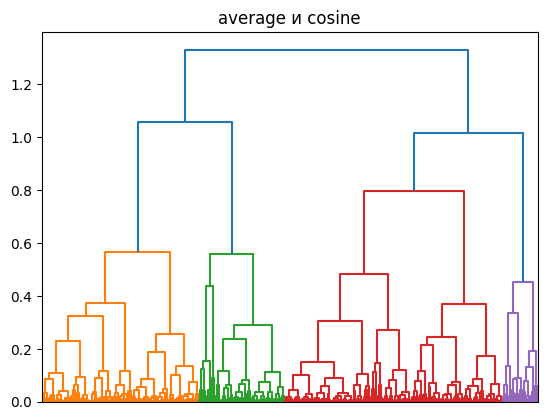

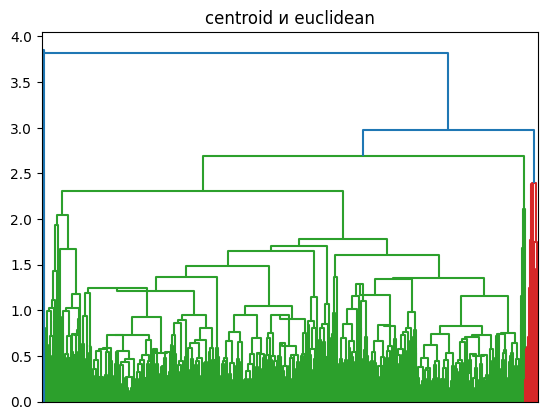

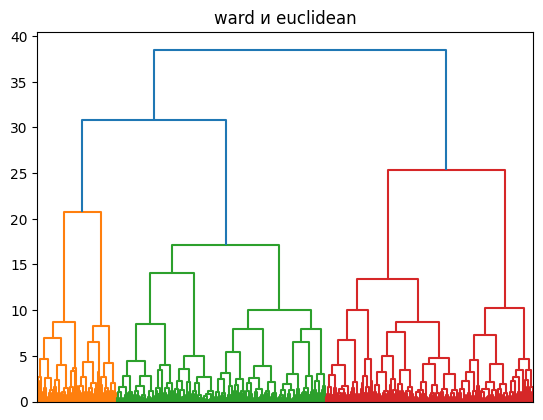

In [20]:
cols_od_ic = itertools.product(['single', 'complete', 'average', 'centroid', 'ward'],
['euclidean', 'cityblock', 'chebyshev', 'cosine'])
for cols in cols_od_ic:
    match cols:
        case [('centroid'|'ward'), ('cityblock'|'chebyshev'|'cosine')]:
            continue
    linked = linkage(baseb_norm,
                        method=cols[0],
                        metric=cols[1])
    _ = plt.figure()
    _ = dendrogram(linked,
                orientation='top',
                no_labels=True,
                distance_sort='descending',
                show_leaf_counts=True)
    _ = plt.title(f'{cols[0]} и {cols[1]}')

    plt.show()



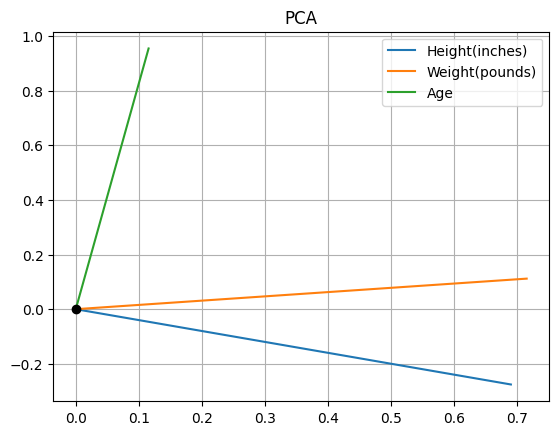

In [21]:
pca = PCA(n_components=2).fit(baseb_norm)
#print(*data.columns, sep='\t'); \
#print(*pca.components_, sep='\n')

for xs,ys in zip(*pca.components_):
    plt.plot([0, xs], [0, ys])
plt.plot(0,0,'ok')
plt.legend(data.columns)
plt.title('PCA')
plt.grid()
plt.show()

In [22]:
pca = PCA(n_components=3).fit(baseb_norm)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.51294163 0.34662598 0.14043239]
[39.86986475 32.77489774 20.86144681]


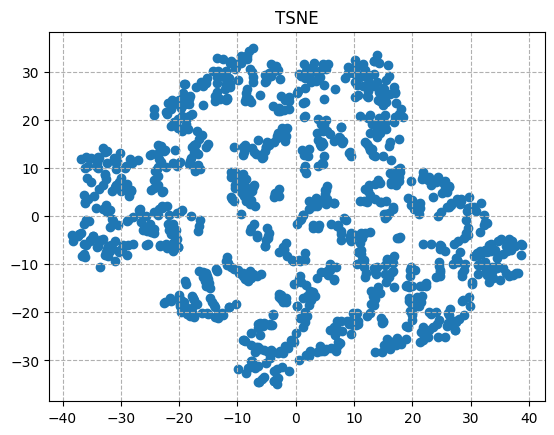

In [23]:
tsne = TSNE().fit(baseb_norm)
xs, ys = tsne.embedding_[:,0], tsne.embedding_[:,1]
plt.scatter(xs, ys)
plt.grid(which='major', linestyle='--')
plt.title('TSNE')
plt.show()


Координаты центров кластеров:
[[-28.454666    2.079953 ]
 [ 31.306616   -8.091549 ]
 [  9.758154   23.353579 ]
 [ -8.16613   -20.833315 ]
 [-11.549978   22.750237 ]
 [ -2.0493526   2.0539546]
 [ 18.261951    3.5859554]
 [ 15.396564  -18.953718 ]]


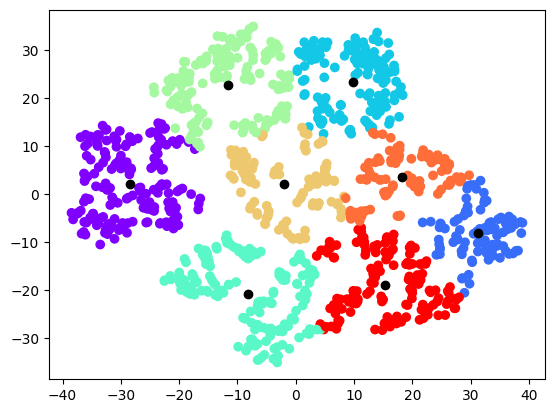

In [24]:
kmeans = KMeans(n_clusters=8, n_init=42, random_state=39)
kmeans.fit(tsne.embedding_)
print('Координаты центров кластеров:')
print(kmeans.cluster_centers_)
plt.scatter(xs, ys, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

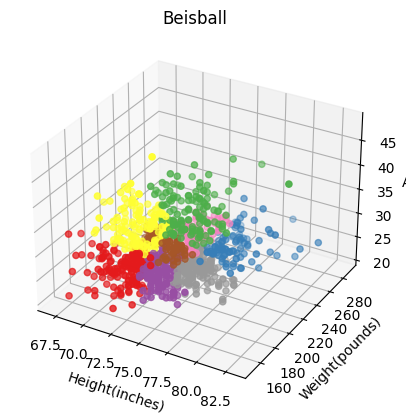

In [25]:

#print(f'Не совпало всего {sum(iris_target != kmeans.labels_)} из {len(kmeans.labels_)}')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs="Height(inches)", ys='Weight(pounds)', zs='Age', data=data, c=kmeans.labels_, cmap='Set1')
ax.set_title("Beisball")
ax.set_xlabel("Height(inches)")
ax.set_ylabel('Weight(pounds)')
ax.set_zlabel('Age')
plt.show()


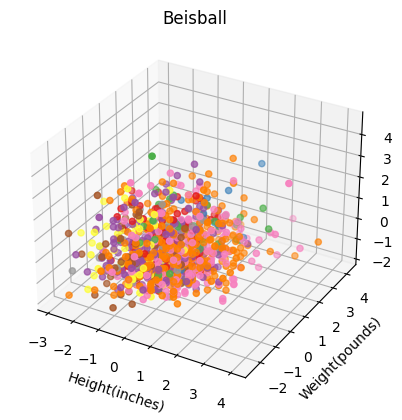

In [26]:
save_or_show_plots = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs="Height(inches)", ys='Weight(pounds)', zs='Age', data=baseb_norm, c = target, cmap='Set1')
ax.set_title("Beisball")
ax.set_xlabel("Height(inches)")
ax.set_ylabel('Weight(pounds)')
ax.set_zlabel('Age')
plt.show()

In [27]:
cols_od_ic = itertools.product(['single', 'complete', 'average', 'centroid', 'ward'],
['euclidean', 'cityblock', 'chebyshev', 'cosine'])

In [28]:
print(*cols_od_ic)

('single', 'euclidean') ('single', 'cityblock') ('single', 'chebyshev') ('single', 'cosine') ('complete', 'euclidean') ('complete', 'cityblock') ('complete', 'chebyshev') ('complete', 'cosine') ('average', 'euclidean') ('average', 'cityblock') ('average', 'chebyshev') ('average', 'cosine') ('centroid', 'euclidean') ('centroid', 'cityblock') ('centroid', 'chebyshev') ('centroid', 'cosine') ('ward', 'euclidean') ('ward', 'cityblock') ('ward', 'chebyshev') ('ward', 'cosine')
